In [168]:
pip install optuna

In [169]:
pip install lime

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import shap
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [225]:
import pandas as pd
import numpy as np
import optuna
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [226]:
df=pd.read_csv('/content/loan_approval_dataset.csv')

In [227]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [228]:
df.shape

(4269, 13)

In [229]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [231]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [232]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

loan_id - 4269
 no_of_dependents - 6
 education - 2
 self_employed - 2
 income_annum - 98
 loan_amount - 378
 loan_term - 10
 cibil_score - 601
 residential_assets_value - 278
 commercial_assets_value - 188
 luxury_assets_value - 379
 bank_asset_value - 146
 loan_status - 2


In [233]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- loan_id ---
loan_id
1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: count, Length: 4269, dtype: int64
----  no_of_dependents ---
 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64
----  education ---
 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
----  self_employed ---
 self_employed
Yes    2150
No     2119
Name: count, dtype: int64
----  income_annum ---
 income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64
----  loan_amount ---
 loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: count, Length: 378, dtype: int64
----  loan_term ---
 loan_term
6     490
12 

# ENCODING CATEGORICAL DATA

In [234]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [235]:
from sklearn.preprocessing import OrdinalEncoder
rank=[' Rejected',' Approved']
oe = OrdinalEncoder(categories=[rank])
df[' loan_status'] = oe.fit_transform(df[[' loan_status']])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [236]:
rank=[' Not Graduate',' Graduate']
oe = OrdinalEncoder(categories=[rank])
df[' education'] = oe.fit_transform(df[[' education']])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [237]:
oe = OrdinalEncoder()
df[' self_employed'] = oe.fit_transform(df[[' self_employed']])

In [238]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


# EDA

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

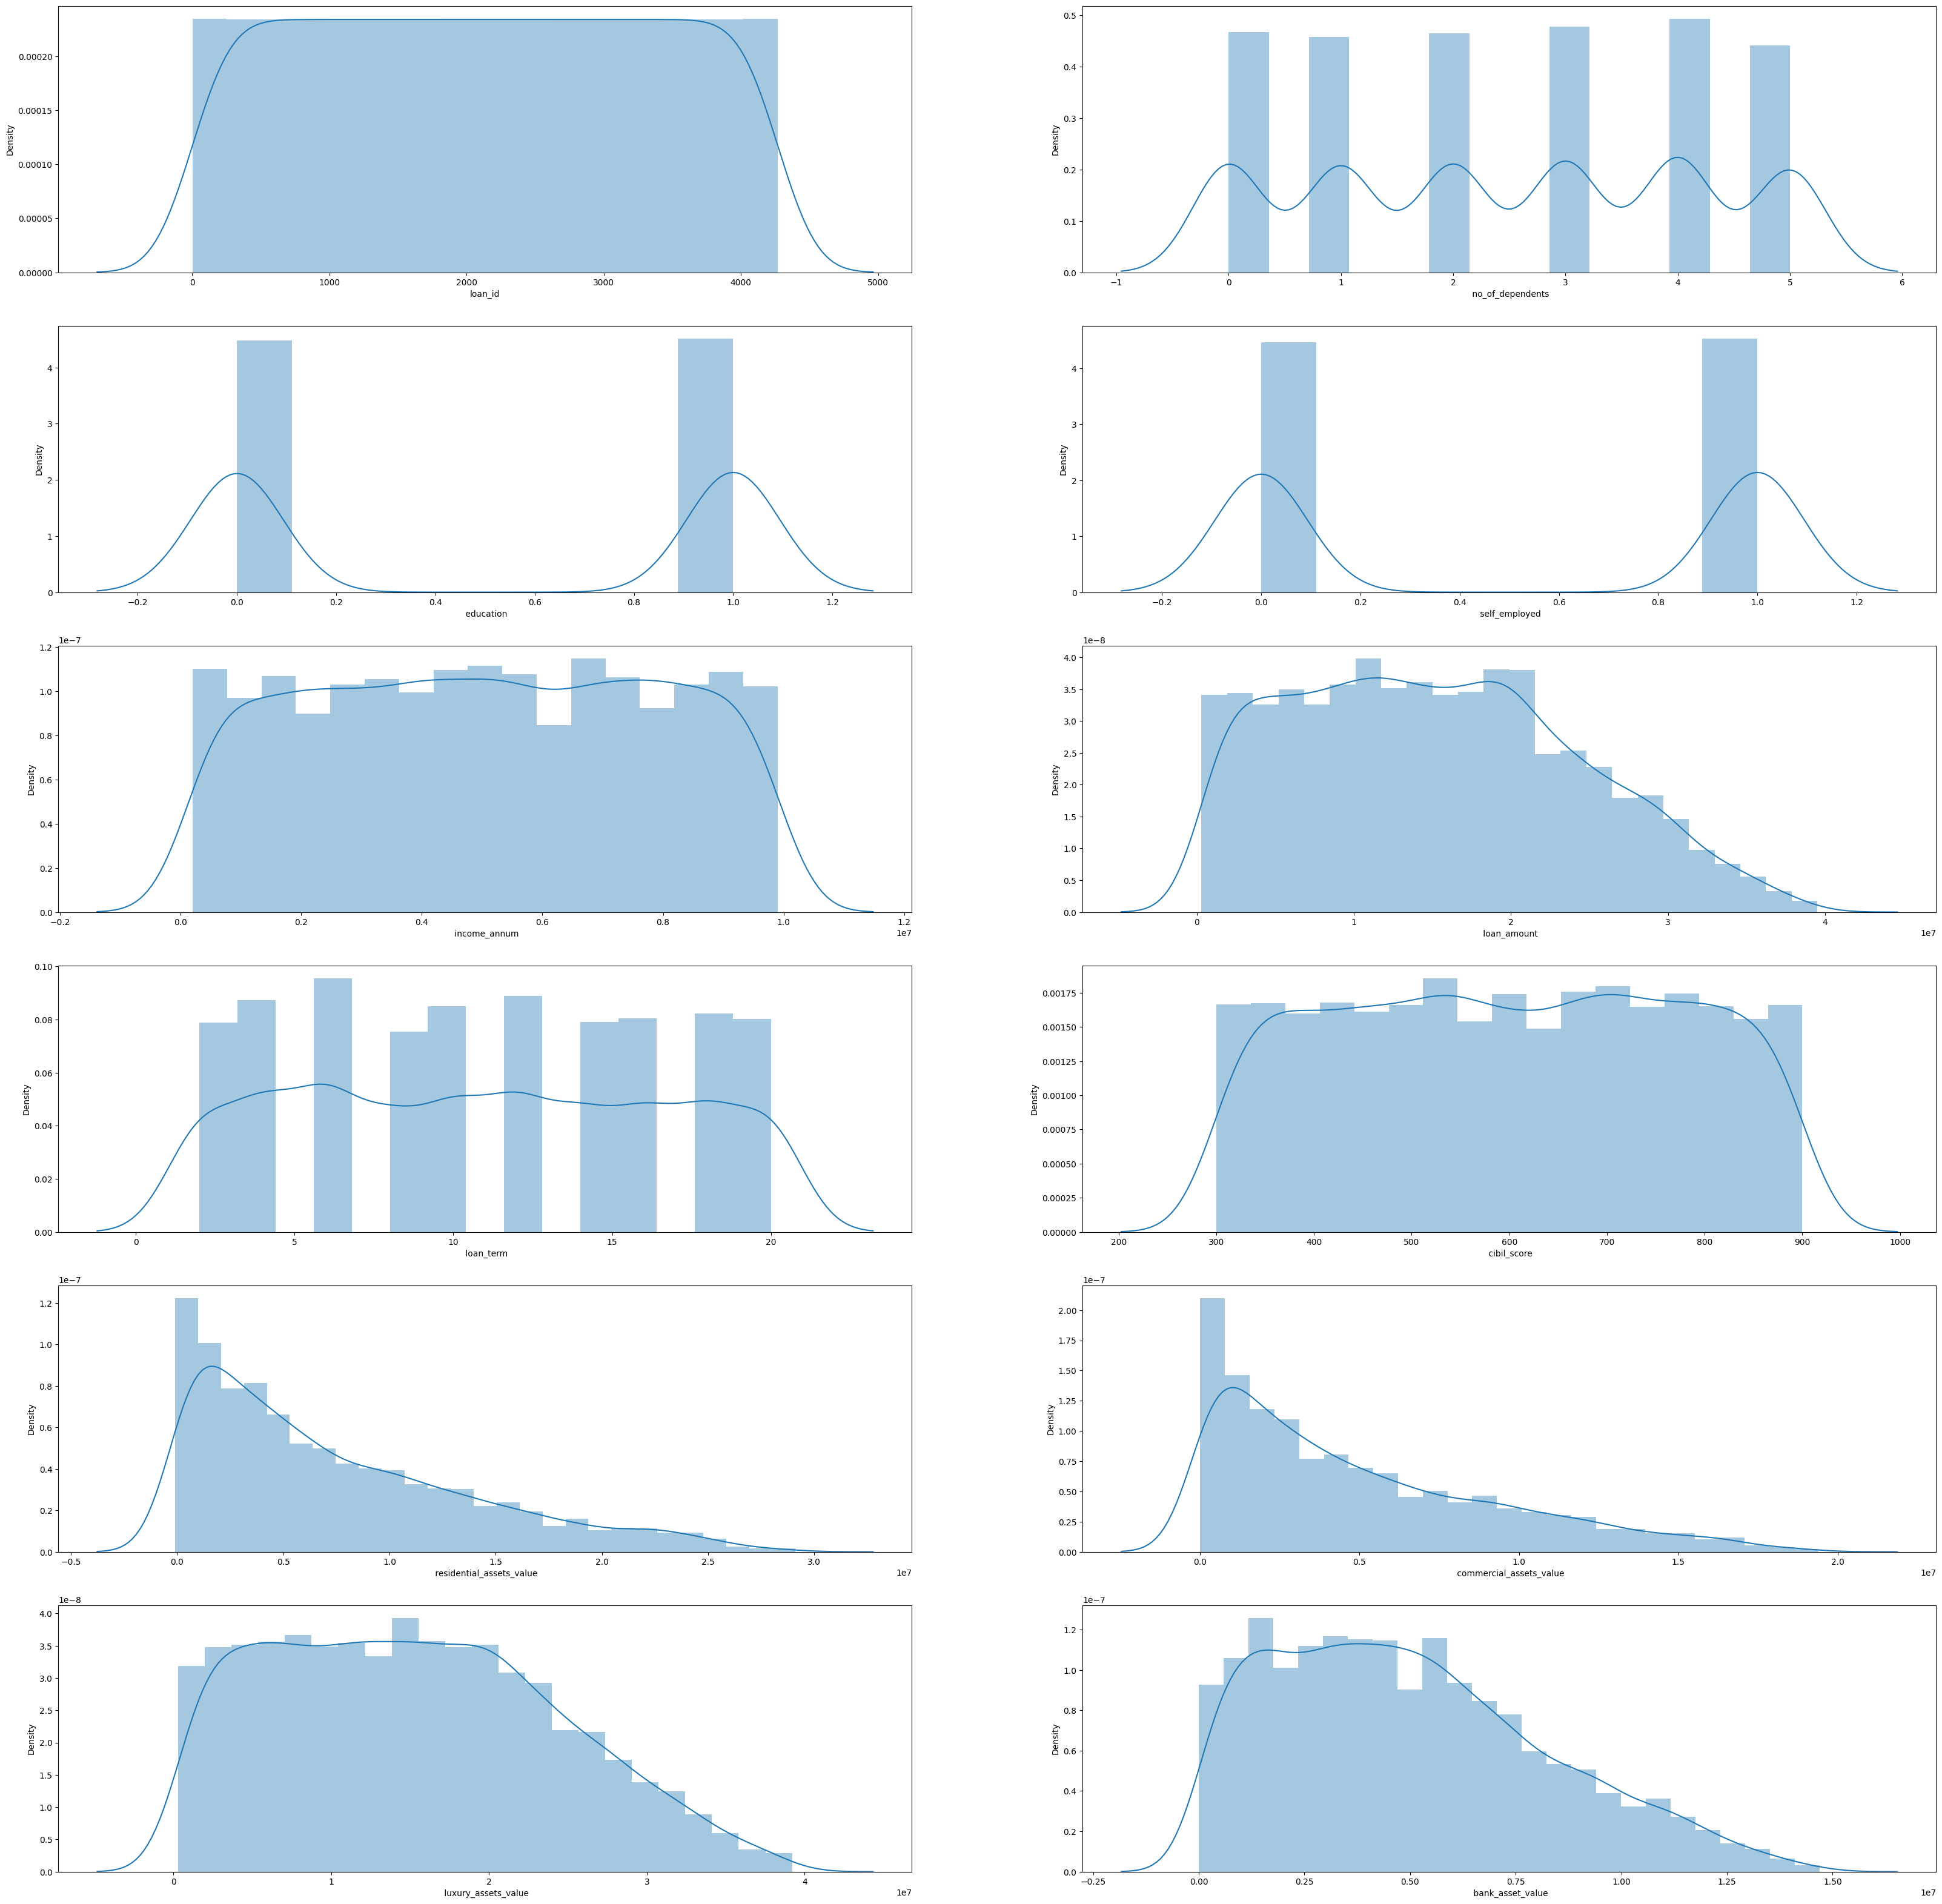

In [240]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.distplot(df[col], ax = ax)

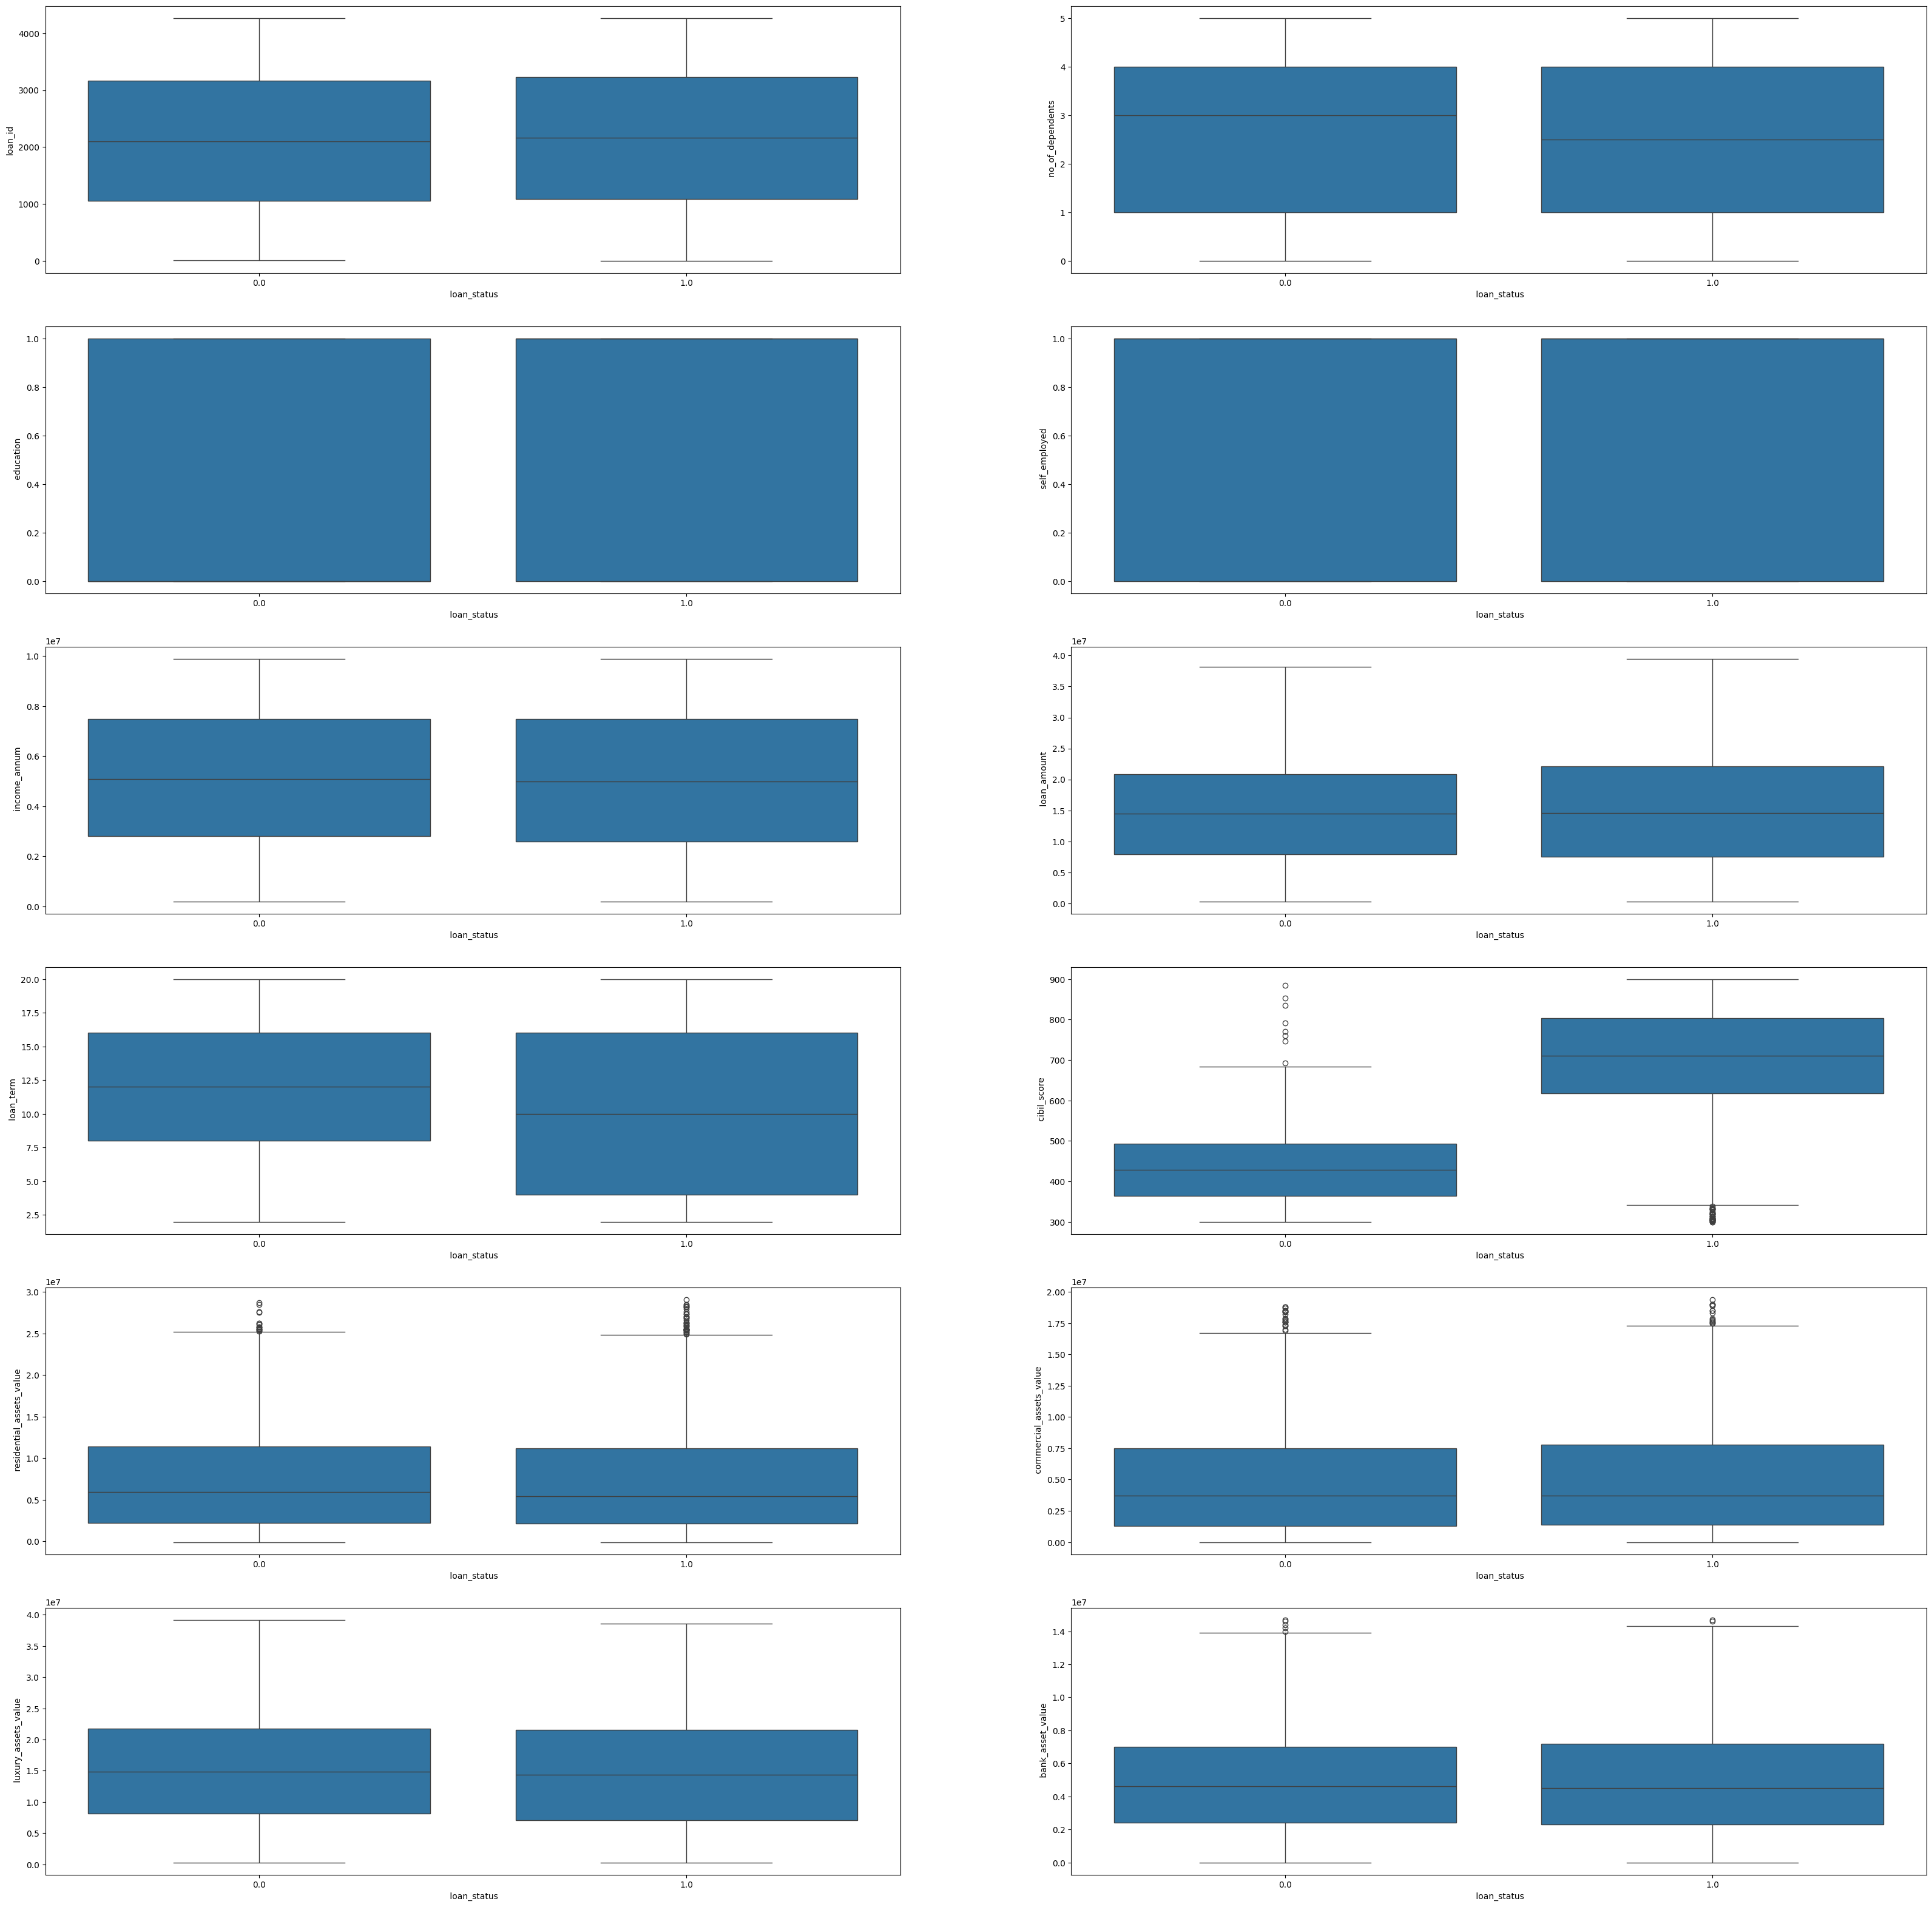

In [241]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

In [242]:
df.drop(['loan_id'],axis=1,inplace=True)

<Axes: >

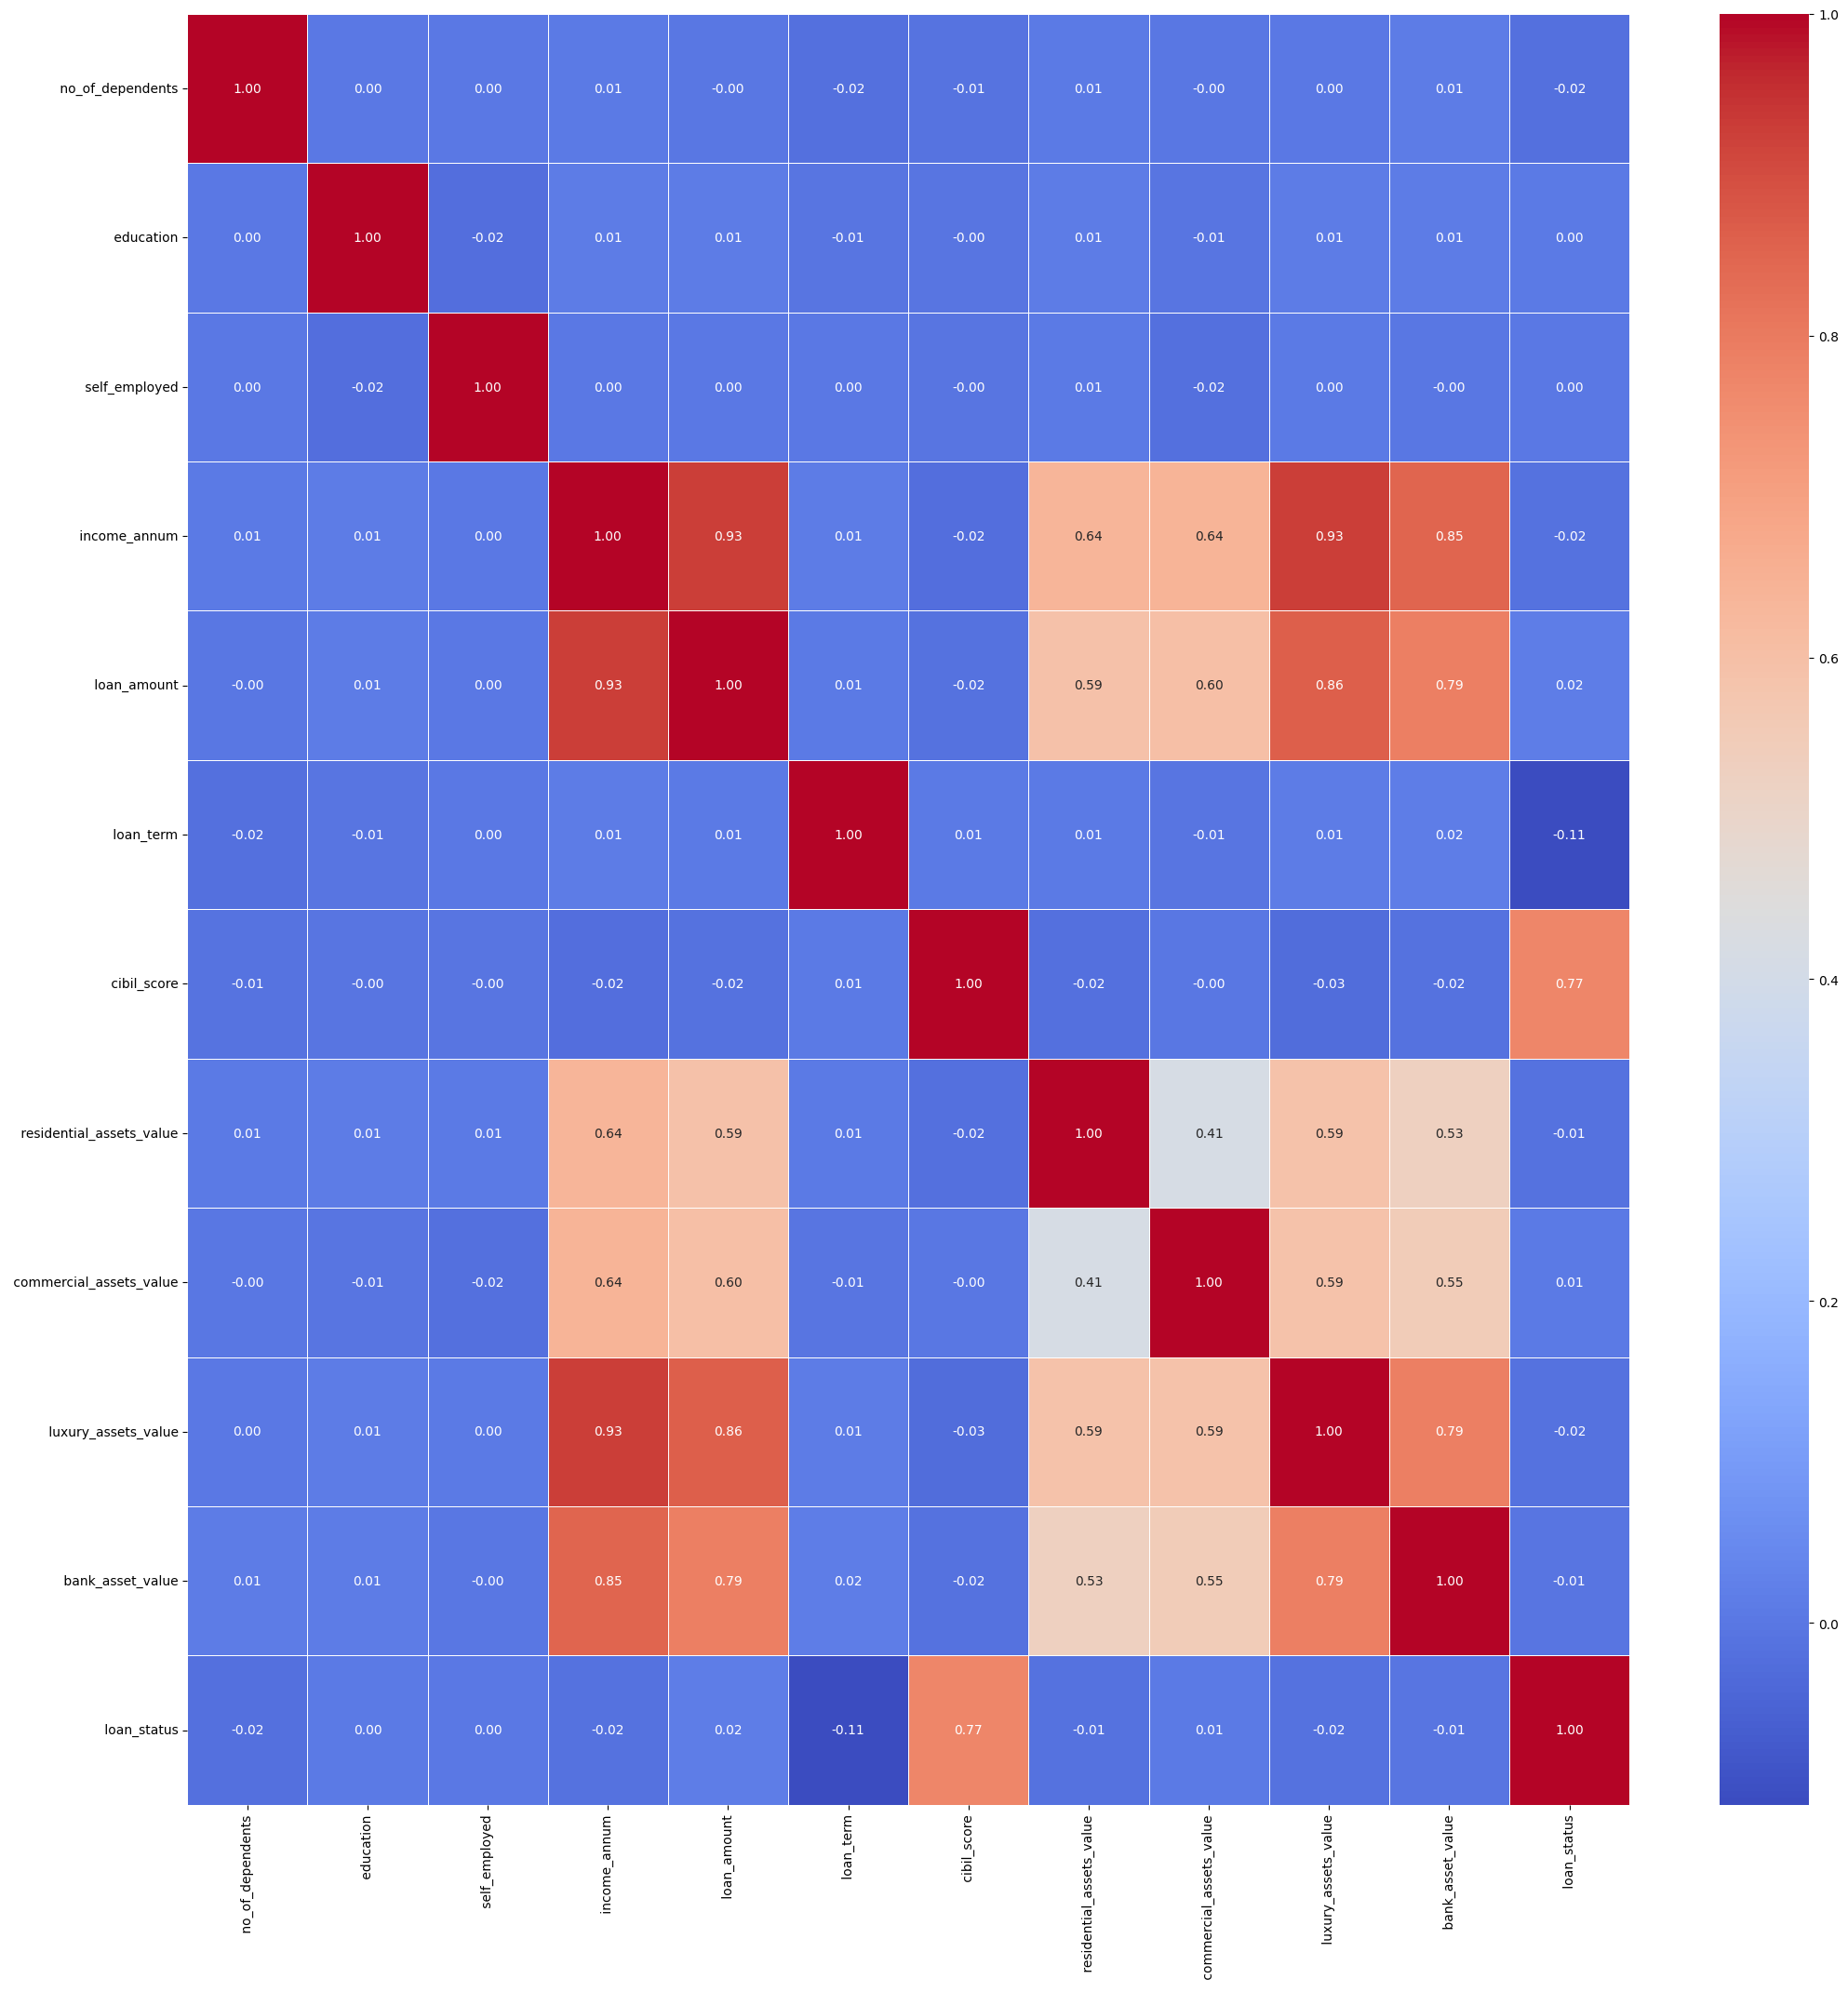

In [243]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [244]:
# WILL DROP CORR 0.00 AND ALSO ONE OF THE FEATURES MORE THAN .85 CORR

df.columns


Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [245]:
df.drop([' education',' self_employed'],axis=1,inplace=True)

In [246]:
df.drop([' income_annum',' loan_amount'],axis=1,inplace=True)

<Axes: >

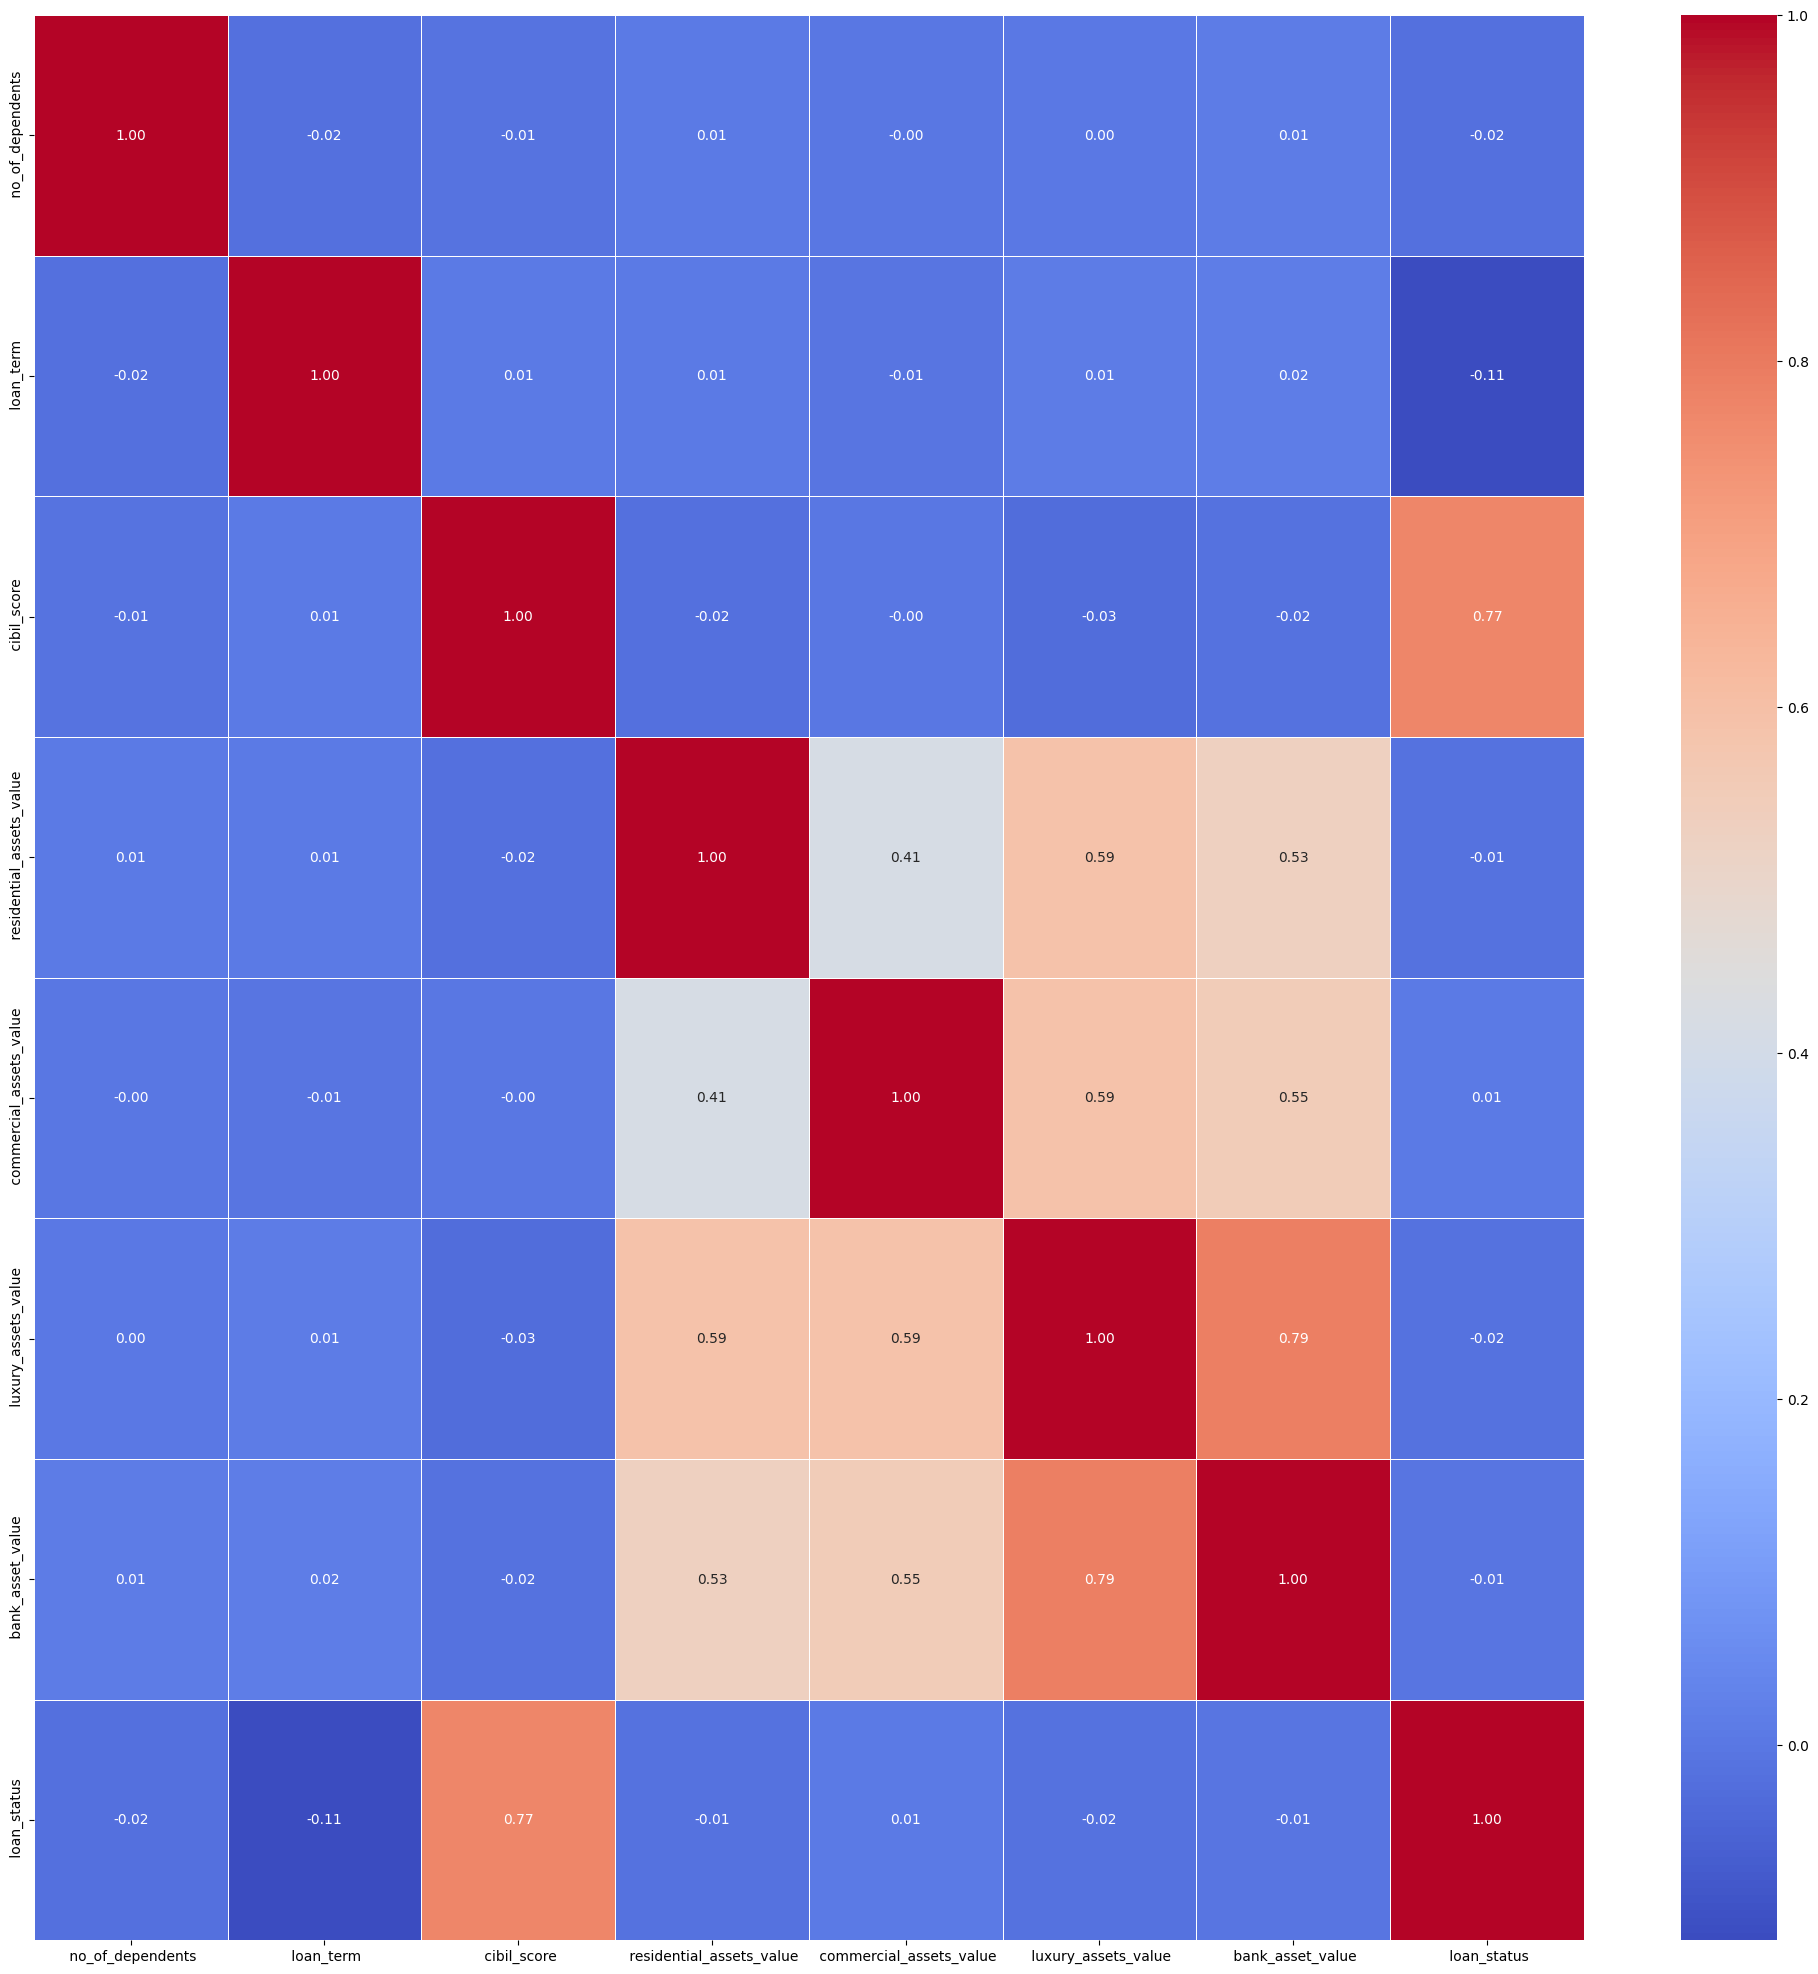

In [247]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

<Axes: xlabel=' cibil_score', ylabel=' loan_term'>

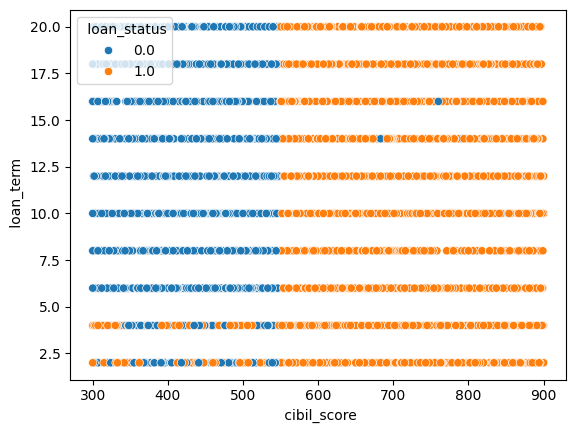

In [248]:
sns.scatterplot(x=' cibil_score', y=' loan_term', hue=' loan_status', data=df)

In [249]:
# TRAIN TEST SPLIT AND FEATURE SCALING

In [250]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=df.drop([' loan_status'],axis=1)
y=df[' loan_status']

In [251]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [252]:
X_train.shape

(3415, 7)

In [253]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [254]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [255]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 3, 8),  # Reduce depth to prevent overfitting
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),  # Control model complexity
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.1),  # Lower LR
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.1, 5),  # L1 regularization
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.1, 5),  # L2 regularization
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.9),  # Random row sampling
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.9),  # Random feature sampling
        'bagging_freq': 5,  # Apply bagging every 5 iterations
    }
    model = LGBMClassifier(**params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

In [256]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2025-02-08 17:28:40,001] A new study created in memory with name: no-name-6945c9b5-3701-40d3-b9f4-4b66515dc753


[LightGBM] [Warning] feature_fraction is set=0.6506627883953786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6506627883953786
[LightGBM] [Warning] bagging_fraction is set=0.6896156301294792, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6896156301294792
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6506627883953786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6506627883953786
[LightGBM] [Warning] bagging_fraction is set=0.6896156301294792, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6896156301294792
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can s

[I 2025-02-08 17:28:40,287] Trial 0 finished with value: 0.9484777517564403 and parameters: {'max_depth': 7, 'num_leaves': 83, 'learning_rate': 0.027195251275090666, 'n_estimators': 245, 'min_child_samples': 35, 'reg_alpha': 1.073955410344868, 'reg_lambda': 0.19292559313639202, 'bagging_fraction': 0.6896156301294792, 'feature_fraction': 0.6506627883953786}. Best is trial 0 with value: 0.9484777517564403.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:40,566] Trial 1 finished with value: 0.955503512880562 and parameters: {'max_depth': 7, 'num_leaves': 58, 'learning_rate': 0.06410557963363045, 'n_estimators': 202, 'min_child_samples': 30, 'reg_alpha': 0.6632484889577571, 'reg_lambda': 0.11872464023072762, 'bagging_fraction': 0.7732327871533771, 'feature_fraction': 0.8018490649734965}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:40,739] Trial 2 finished with value: 0.9508196721311475 and parameters: {'max_depth': 7, 'num_leaves': 96, 'learning_rate': 0.028751025599749458, 'n_estimators': 120, 'min_child_samples': 16, 'reg_alpha': 0.13486322239093956, 'reg_lambda': 0.10676773320583373, 'bagging_fraction': 0.6260706967780054, 'feature_fraction': 0.6710737182151981}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:41,078] Trial 3 finished with value: 0.9519906323185011 and parameters: {'max_depth': 8, 'num_leaves': 84, 'learning_rate': 0.0062402910930172695, 'n_estimators': 282, 'min_child_samples': 35, 'reg_alpha': 0.15050636441059675, 'reg_lambda': 0.247233032406597, 'bagging_fraction': 0.7447141799339281, 'feature_fraction': 0.8623440954691626}. Best is trial 1 with value: 0.955503512880562.
[I 2025-02-08 17:28:41,248] Trial 4 finished with value: 0.9473067915690867 and parameters: {'max_depth': 7, 'num_leaves': 81, 'learning_rate': 0.03608352930744547, 'n_estimators': 133, 'min_child_samples': 19, 'reg_alpha': 0.34782025373806413, 'reg_lambda': 0.9828434623562787, 'bagging_fraction': 0.670128344689154, 'feature_fraction': 0.7375265651021794}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8623440954691626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8623440954691626
[LightGBM] [Warning] bagging_fraction is set=0.7447141799339281, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7447141799339281
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7375265651021794, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7375265651021794
[LightGBM] [Warning] bagging_fraction is set=0.670128344689154

[I 2025-02-08 17:28:41,456] Trial 5 finished with value: 0.949648711943794 and parameters: {'max_depth': 8, 'num_leaves': 81, 'learning_rate': 0.02553901060822598, 'n_estimators': 167, 'min_child_samples': 21, 'reg_alpha': 1.8810143276858804, 'reg_lambda': 1.153980508441248, 'bagging_fraction': 0.8469810468831439, 'feature_fraction': 0.781657309857154}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] feature_fraction is set=0.781657309857154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.781657309857154
[LightGBM] [Warning] bagging_fraction is set=0.8469810468831439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8469810468831439
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.781657309857154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.781657309857154
[LightGBM] [Warning] bagging_fraction is set=0.8469810468831439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8469810468831439
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `

[I 2025-02-08 17:28:41,824] Trial 6 finished with value: 0.9543325526932084 and parameters: {'max_depth': 8, 'num_leaves': 51, 'learning_rate': 0.06878727258587256, 'n_estimators': 255, 'min_child_samples': 38, 'reg_alpha': 0.11883150646445594, 'reg_lambda': 0.3039062926385074, 'bagging_fraction': 0.7031510657721667, 'feature_fraction': 0.6594692926910818}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:42,061] Trial 7 finished with value: 0.955503512880562 and parameters: {'max_depth': 5, 'num_leaves': 51, 'learning_rate': 0.006198187424022775, 'n_estimators': 215, 'min_child_samples': 48, 'reg_alpha': 0.35594150195175384, 'reg_lambda': 1.1403343526748864, 'bagging_fraction': 0.7108054806065088, 'feature_fraction': 0.6235750824739507}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:42,264] Trial 8 finished with value: 0.9484777517564403 and parameters: {'max_depth': 8, 'num_leaves': 88, 'learning_rate': 0.0410583558904108, 'n_estimators': 148, 'min_child_samples': 16, 'reg_alpha': 0.15147796924340223, 'reg_lambda': 0.3601477372324205, 'bagging_fraction': 0.640369485409216, 'feature_fraction': 0.8275669701142316}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:42,416] Trial 9 finished with value: 0.9461358313817331 and parameters: {'max_depth': 7, 'num_leaves': 55, 'learning_rate': 0.03457569513570835, 'n_estimators': 103, 'min_child_samples': 17, 'reg_alpha': 0.3712200109816382, 'reg_lambda': 0.6377704524613014, 'bagging_fraction': 0.6254876346787985, 'feature_fraction': 0.64919477745373}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:42,655] Trial 10 finished with value: 0.9519906323185011 and parameters: {'max_depth': 3, 'num_leaves': 25, 'learning_rate': 0.09977643344305573, 'n_estimators': 186, 'min_child_samples': 28, 'reg_alpha': 3.661282562426603, 'reg_lambda': 3.649063414222476, 'bagging_fraction': 0.8760894036294689, 'feature_fraction': 0.8986049160100731}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:42,930] Trial 11 finished with value: 0.9484777517564403 and parameters: {'max_depth': 5, 'num_leaves': 39, 'learning_rate': 0.010974045270203157, 'n_estimators': 214, 'min_child_samples': 49, 'reg_alpha': 0.5972687377093799, 'reg_lambda': 2.179732101199546, 'bagging_fraction': 0.7947122328838438, 'feature_fraction': 0.7334365232332085}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] feature_fraction is set=0.7334365232332085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7334365232332085
[LightGBM] [Warning] bagging_fraction is set=0.7947122328838438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7947122328838438
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6092374666718298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6092374666718298
[LightGBM] [Warning] bagging_fraction is set=0.7690243334766641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7690243334766641
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6092374666718298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6092374666718298
[LightGBM] [Warning] bagging

[I 2025-02-08 17:28:43,203] Trial 12 finished with value: 0.9449648711943794 and parameters: {'max_depth': 5, 'num_leaves': 63, 'learning_rate': 0.014161317392306206, 'n_estimators': 217, 'min_child_samples': 49, 'reg_alpha': 0.3561759254383124, 'reg_lambda': 1.8504389890646185, 'bagging_fraction': 0.7690243334766641, 'feature_fraction': 0.6092374666718298}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:43,455] Trial 13 finished with value: 0.9531615925058547 and parameters: {'max_depth': 4, 'num_leaves': 66, 'learning_rate': 0.006125636528030161, 'n_estimators': 193, 'min_child_samples': 43, 'reg_alpha': 0.8976349175241752, 'reg_lambda': 0.5524992533645499, 'bagging_fraction': 0.8127862138647862, 'feature_fraction': 0.7989305908105482}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:43,793] Trial 14 finished with value: 0.9531615925058547 and parameters: {'max_depth': 6, 'num_leaves': 42, 'learning_rate': 0.014702684160961096, 'n_estimators': 242, 'min_child_samples': 26, 'reg_alpha': 0.5341301958199384, 'reg_lambda': 0.10565574421173375, 'bagging_fraction': 0.7311021689265618, 'feature_fraction': 0.7105394074700953}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:44,197] Trial 15 finished with value: 0.9531615925058547 and parameters: {'max_depth': 6, 'num_leaves': 70, 'learning_rate': 0.06328784436218116, 'n_estimators': 283, 'min_child_samples': 11, 'reg_alpha': 1.6171995999609357, 'reg_lambda': 1.5274093202647478, 'bagging_fraction': 0.7865649132370749, 'feature_fraction': 0.785140467478003}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.785140467478003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.785140467478003
[LightGBM] [Warning] bagging_fraction is set=0.7865649132370749, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7865649132370749
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6051627024462662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6051627024462662
[LightGBM] [Warning] bagging_fraction is set=0.7258191063556609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.725819106

[I 2025-02-08 17:28:44,420] Trial 16 finished with value: 0.9543325526932084 and parameters: {'max_depth': 4, 'num_leaves': 38, 'learning_rate': 0.008493982331543713, 'n_estimators': 168, 'min_child_samples': 43, 'reg_alpha': 0.2295653278586929, 'reg_lambda': 4.987585315396992, 'bagging_fraction': 0.7258191063556609, 'feature_fraction': 0.6051627024462662}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:44,753] Trial 17 finished with value: 0.9484777517564403 and parameters: {'max_depth': 6, 'num_leaves': 50, 'learning_rate': 0.017833593561906592, 'n_estimators': 214, 'min_child_samples': 31, 'reg_alpha': 0.25189811919317845, 'reg_lambda': 0.4342143266695456, 'bagging_fraction': 0.827710644078386, 'feature_fraction': 0.6950192388695728}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:45,200] Trial 18 finished with value: 0.949648711943794 and parameters: {'max_depth': 4, 'num_leaves': 29, 'learning_rate': 0.05208860287320101, 'n_estimators': 229, 'min_child_samples': 24, 'reg_alpha': 1.4813365254355655, 'reg_lambda': 0.17381907584714731, 'bagging_fraction': 0.8931299372135098, 'feature_fraction': 0.8380336765174556}. Best is trial 1 with value: 0.955503512880562.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-08 17:28:45,558] Trial 19 finished with value: 0.9508196721311475 and parameters: {'max_depth': 5, 'num_leaves': 72, 'learning_rate': 0.09996985588806029, 'n_estimators': 177, 'min_child_samples': 42, 'reg_alpha': 2.985857480899803, 'reg_lambda': 0.8675634253088067, 'bagging_fraction': 0.6712619010580907, 'feature_fraction': 0.7561161427223263}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:45,945] Trial 20 finished with value: 0.9543325526932084 and parameters: {'max_depth': 3, 'num_leaves': 58, 'learning_rate': 0.005187581159906524, 'n_estimators': 261, 'min_child_samples': 32, 'reg_alpha': 0.772990774772523, 'reg_lambda': 2.2092010392880645, 'bagging_fraction': 0.7623528674926316, 'feature_fraction': 0.8996143795914303}. Best is trial 1 with value: 0.955503512880562.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-08 17:28:46,530] Trial 21 finished with value: 0.9519906323185011 and parameters: {'max_depth': 8, 'num_leaves': 50, 'learning_rate': 0.0742249862157555, 'n_estimators': 264, 'min_child_samples': 39, 'reg_alpha': 0.10174505615275638, 'reg_lambda': 0.31434050125334756, 'bagging_fraction': 0.6942653085047586, 'feature_fraction': 0.6307869357693081}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] feature_fraction is set=0.6922586462164341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6922586462164341
[LightGBM] [Warning] bagging_fraction is set=0.707536961434589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.707536961434589
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6922586462164341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6922586462164341
[LightGBM] [Warning] bagging_fraction is set=0.707536961434589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.707536961434589
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `

[I 2025-02-08 17:28:46,987] Trial 22 finished with value: 0.955503512880562 and parameters: {'max_depth': 7, 'num_leaves': 49, 'learning_rate': 0.049624313078581624, 'n_estimators': 203, 'min_child_samples': 38, 'reg_alpha': 0.46772204777152354, 'reg_lambda': 0.1351989728964253, 'bagging_fraction': 0.707536961434589, 'feature_fraction': 0.6922586462164341}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:47,403] Trial 23 finished with value: 0.9508196721311475 and parameters: {'max_depth': 6, 'num_leaves': 44, 'learning_rate': 0.04931846688607848, 'n_estimators': 199, 'min_child_samples': 46, 'reg_alpha': 0.4628595568538141, 'reg_lambda': 0.15631679529274814, 'bagging_fraction': 0.7098126162019844, 'feature_fraction': 0.6926173572403032}. Best is trial 1 with value: 0.955503512880562.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-08 17:28:47,871] Trial 24 finished with value: 0.9461358313817331 and parameters: {'max_depth': 7, 'num_leaves': 31, 'learning_rate': 0.02043447962013553, 'n_estimators': 227, 'min_child_samples': 34, 'reg_alpha': 0.23649913823336835, 'reg_lambda': 0.11873997867075635, 'bagging_fraction': 0.6599680981017626, 'feature_fraction': 0.7570089896940879}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:48,214] Trial 25 finished with value: 0.949648711943794 and parameters: {'max_depth': 5, 'num_leaves': 60, 'learning_rate': 0.05262405096708507, 'n_estimators': 156, 'min_child_samples': 38, 'reg_alpha': 0.6477577716890427, 'reg_lambda': 0.21991712974134175, 'bagging_fraction': 0.7428661720747305, 'feature_fraction': 0.7163528493020287}. Best is trial 1 with value: 0.955503512880562.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-08 17:28:48,544] Trial 26 finished with value: 0.9508196721311475 and parameters: {'max_depth': 6, 'num_leaves': 45, 'learning_rate': 0.0775803524911764, 'n_estimators': 197, 'min_child_samples': 46, 'reg_alpha': 1.1621349236921472, 'reg_lambda': 0.4707804284301287, 'bagging_fraction': 0.721227946147682, 'feature_fraction': 0.6270454154267985}. Best is trial 1 with value: 0.955503512880562.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-08 17:28:48,818] Trial 27 finished with value: 0.955503512880562 and parameters: {'max_depth': 7, 'num_leaves': 20, 'learning_rate': 0.009795805867175027, 'n_estimators': 212, 'min_child_samples': 29, 'reg_alpha': 0.40541248147743564, 'reg_lambda': 0.14152300276187654, 'bagging_fraction': 0.7747583533635213, 'feature_fraction': 0.6802787111435392}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] feature_fraction is set=0.8245293140233944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245293140233944
[LightGBM] [Warning] bagging_fraction is set=0.6071120617346941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6071120617346941
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8245293140233944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245293140233944
[LightGBM] [Warning] bagging_fraction is set=0.6071120617346941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6071120617346941
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can s

[I 2025-02-08 17:28:49,223] Trial 28 finished with value: 0.9531615925058547 and parameters: {'max_depth': 6, 'num_leaves': 74, 'learning_rate': 0.03986905395749666, 'n_estimators': 300, 'min_child_samples': 41, 'reg_alpha': 0.29993168042928975, 'reg_lambda': 1.3182676662663375, 'bagging_fraction': 0.6071120617346941, 'feature_fraction': 0.8245293140233944}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:49,550] Trial 29 finished with value: 0.949648711943794 and parameters: {'max_depth': 7, 'num_leaves': 55, 'learning_rate': 0.03060787206587725, 'n_estimators': 239, 'min_child_samples': 46, 'reg_alpha': 0.9708170417258054, 'reg_lambda': 0.8346020774915438, 'bagging_fraction': 0.7547246597749516, 'feature_fraction': 0.6317004664143042}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:49,815] Trial 30 finished with value: 0.9473067915690867 and parameters: {'max_depth': 5, 'num_leaves': 35, 'learning_rate': 0.02221334615956957, 'n_estimators': 183, 'min_child_samples': 35, 'reg_alpha': 0.18035685845566843, 'reg_lambda': 0.2042665412842148, 'bagging_fraction': 0.6776561927590603, 'feature_fraction': 0.7736929785643762}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:50,078] Trial 31 finished with value: 0.949648711943794 and parameters: {'max_depth': 7, 'num_leaves': 20, 'learning_rate': 0.009011563626958017, 'n_estimators': 207, 'min_child_samples': 29, 'reg_alpha': 0.4596653677818872, 'reg_lambda': 0.14274718556948593, 'bagging_fraction': 0.7763013544699857, 'feature_fraction': 0.6757353237053371}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:50,407] Trial 32 finished with value: 0.949648711943794 and parameters: {'max_depth': 7, 'num_leaves': 65, 'learning_rate': 0.007583437003445026, 'n_estimators': 227, 'min_child_samples': 24, 'reg_alpha': 0.43103945986097575, 'reg_lambda': 0.13882463958593935, 'bagging_fraction': 0.8048774946874897, 'feature_fraction': 0.682877814871515}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:50,672] Trial 33 finished with value: 0.9508196721311475 and parameters: {'max_depth': 7, 'num_leaves': 20, 'learning_rate': 0.012347520713651609, 'n_estimators': 211, 'min_child_samples': 33, 'reg_alpha': 0.799763592923636, 'reg_lambda': 0.25265260164375314, 'bagging_fraction': 0.7426841627023164, 'feature_fraction': 0.6547286158047068}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:50,965] Trial 34 finished with value: 0.9473067915690867 and parameters: {'max_depth': 8, 'num_leaves': 47, 'learning_rate': 0.006697769688317234, 'n_estimators': 203, 'min_child_samples': 27, 'reg_alpha': 0.5689693778996655, 'reg_lambda': 0.10620214522732162, 'bagging_fraction': 0.7144126842449537, 'feature_fraction': 0.711110589460059}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:51,308] Trial 35 finished with value: 0.9473067915690867 and parameters: {'max_depth': 7, 'num_leaves': 99, 'learning_rate': 0.005005803642640196, 'n_estimators': 233, 'min_child_samples': 36, 'reg_alpha': 0.19496065502395804, 'reg_lambda': 0.1852622015983588, 'bagging_fraction': 0.8380282003520845, 'feature_fraction': 0.7392588321970089}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:51,640] Trial 36 finished with value: 0.9508196721311475 and parameters: {'max_depth': 6, 'num_leaves': 54, 'learning_rate': 0.00976460459842552, 'n_estimators': 250, 'min_child_samples': 30, 'reg_alpha': 0.28464614681167344, 'reg_lambda': 0.12659549052994068, 'bagging_fraction': 0.7802193308490478, 'feature_fraction': 0.6633057251512064}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:51,914] Trial 37 finished with value: 0.9543325526932084 and parameters: {'max_depth': 8, 'num_leaves': 92, 'learning_rate': 0.025636607540360325, 'n_estimators': 175, 'min_child_samples': 22, 'reg_alpha': 1.1425047565487148, 'reg_lambda': 0.25236922363227815, 'bagging_fraction': 0.6939213105652977, 'feature_fraction': 0.8036427401960796}. Best is trial 1 with value: 0.955503512880562.
[I 2025-02-08 17:28:52,160] Trial 38 finished with value: 0.9508196721311475 and parameters: {'max_depth': 8, 'num_leaves': 78, 'learning_rate': 0.0627202427670805, 'n_estimators': 147, 'min_child_samples': 40, 'reg_alpha': 0.41280191585502846, 'reg_lambda': 0.1007155700516413, 'bagging_fraction': 0.6488169441748088, 'feature_fraction': 0.7229657549100742}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] feature_fraction is set=0.7229657549100742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229657549100742
[LightGBM] [Warning] bagging_fraction is set=0.6488169441748088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6488169441748088
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7229657549100742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229657549100742
[LightGBM] [Warning] bagging_fraction is set=0.6488169441748088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6488169441748088
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can s

[I 2025-02-08 17:28:52,427] Trial 39 finished with value: 0.9508196721311475 and parameters: {'max_depth': 7, 'num_leaves': 33, 'learning_rate': 0.0070575907632921915, 'n_estimators': 190, 'min_child_samples': 36, 'reg_alpha': 0.3161804845857546, 'reg_lambda': 0.1690492852318833, 'bagging_fraction': 0.7366120823659875, 'feature_fraction': 0.6450969063328291}. Best is trial 1 with value: 0.955503512880562.


[LightGBM] [Warning] feature_fraction is set=0.6975523699145958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6975523699145958
[LightGBM] [Warning] bagging_fraction is set=0.7564530137960623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7564530137960623
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6975523699145958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6975523699145958
[LightGBM] [Warning] bagging_fraction is set=0.7564530137960623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7564530137960623
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can s

[I 2025-02-08 17:28:52,799] Trial 40 finished with value: 0.9590163934426229 and parameters: {'max_depth': 7, 'num_leaves': 61, 'learning_rate': 0.08202568367286237, 'n_estimators': 221, 'min_child_samples': 25, 'reg_alpha': 0.6857187840097765, 'reg_lambda': 1.051665702645139, 'bagging_fraction': 0.7564530137960623, 'feature_fraction': 0.6975523699145958}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:53,166] Trial 41 finished with value: 0.955503512880562 and parameters: {'max_depth': 7, 'num_leaves': 61, 'learning_rate': 0.09195760351465969, 'n_estimators': 222, 'min_child_samples': 25, 'reg_alpha': 0.6817903899185557, 'reg_lambda': 1.1577915696340586, 'bagging_fraction': 0.7581356592269057, 'feature_fraction': 0.6984827941881638}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.6984827941881638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6984827941881638
[LightGBM] [Warning] bagging_fraction is set=0.7581356592269057, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7581356592269057
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: baggin

[I 2025-02-08 17:28:53,499] Trial 42 finished with value: 0.9543325526932084 and parameters: {'max_depth': 7, 'num_leaves': 68, 'learning_rate': 0.0860179532578231, 'n_estimators': 208, 'min_child_samples': 20, 'reg_alpha': 0.5104551224149032, 'reg_lambda': 0.7581865936080682, 'bagging_fraction': 0.7053334978541009, 'feature_fraction': 0.6725850715010415}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:53,879] Trial 43 finished with value: 0.9590163934426229 and parameters: {'max_depth': 7, 'num_leaves': 56, 'learning_rate': 0.04657260862688036, 'n_estimators': 220, 'min_child_samples': 28, 'reg_alpha': 0.37687485888185884, 'reg_lambda': 0.6237216429711395, 'bagging_fraction': 0.8006474369847411, 'feature_fraction': 0.8567443450095826}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:54,281] Trial 44 finished with value: 0.955503512880562 and parameters: {'max_depth': 8, 'num_leaves': 57, 'learning_rate': 0.062370041235682794, 'n_estimators': 242, 'min_child_samples': 22, 'reg_alpha': 0.7306652327349707, 'reg_lambda': 2.6846174674800545, 'bagging_fraction': 0.7982553555679857, 'feature_fraction': 0.8808208543130392}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:54,602] Trial 45 finished with value: 0.955503512880562 and parameters: {'max_depth': 6, 'num_leaves': 52, 'learning_rate': 0.04419019459637858, 'n_estimators': 199, 'min_child_samples': 28, 'reg_alpha': 0.33009796859444757, 'reg_lambda': 0.6480485019891975, 'bagging_fraction': 0.8192707766959122, 'feature_fraction': 0.85886451213733}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] feature_fraction is set=0.8695319481359602, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695319481359602
[LightGBM] [Warning] bagging_fraction is set=0.6796590212222778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6796590212222778
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8695319481359602, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695319481359602
[LightGBM] [Warning] bagging_fraction is set=0.6796590212222778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6796590212222778
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can s

[I 2025-02-08 17:28:54,928] Trial 46 finished with value: 0.9508196721311475 and parameters: {'max_depth': 5, 'num_leaves': 63, 'learning_rate': 0.03463906786146896, 'n_estimators': 222, 'min_child_samples': 50, 'reg_alpha': 0.5717490335641694, 'reg_lambda': 1.0015447034923368, 'bagging_fraction': 0.6796590212222778, 'feature_fraction': 0.8695319481359602}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:55,214] Trial 47 finished with value: 0.9508196721311475 and parameters: {'max_depth': 4, 'num_leaves': 48, 'learning_rate': 0.05984856732623722, 'n_estimators': 186, 'min_child_samples': 17, 'reg_alpha': 0.8631298998493138, 'reg_lambda': 1.610282753607953, 'bagging_fraction': 0.8513319545125608, 'feature_fraction': 0.8478171716008512}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:55,555] Trial 48 finished with value: 0.949648711943794 and parameters: {'max_depth': 8, 'num_leaves': 40, 'learning_rate': 0.029969541499665804, 'n_estimators': 235, 'min_child_samples': 31, 'reg_alpha': 1.2884351100876468, 'reg_lambda': 1.0774628146170944, 'bagging_fraction': 0.787309087993991, 'feature_fraction': 0.8174436272971477}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-08 17:28:55,985] Trial 49 finished with value: 0.9461358313817331 and parameters: {'max_depth': 6, 'num_leaves': 58, 'learning_rate': 0.08031639715983876, 'n_estimators': 250, 'min_child_samples': 14, 'reg_alpha': 0.3647911122739974, 'reg_lambda': 0.49166832466245686, 'bagging_fraction': 0.7499808605046347, 'feature_fraction': 0.8078719331924074}. Best is trial 40 with value: 0.9590163934426229.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [257]:
# Train best model
best_params = study.best_params
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

[LightGBM] [Warning] feature_fraction is set=0.6975523699145958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6975523699145958
[LightGBM] [Warning] bagging_fraction is set=0.7564530137960623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7564530137960623
[LightGBM] [Warning] feature_fraction is set=0.6975523699145958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6975523699145958
[LightGBM] [Warning] bagging_fraction is set=0.7564530137960623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7564530137960623
[LightGBM] [Info] Number of positive: 2125, number of negative: 1290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]:

In [258]:
# Performance Metrics
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Model Accuracy: 0.9531615925058547
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       323
         1.0       0.96      0.96      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



In [283]:
from sklearn.metrics import f1_score,confusion_matrix, classification_report

In [284]:
f1_rf=f1_score(y_pred,y_test)
f1_rf

0.9623352165725048

In [287]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred) # Use confusion_matrix directly
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       323
         1.0       0.96      0.96      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



Text(50.722222222222214, 0.5, 'True')

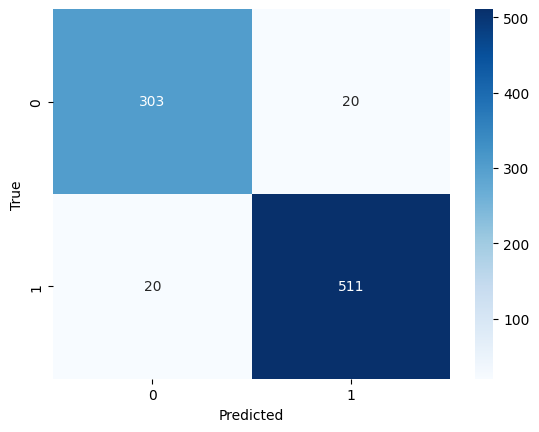

In [288]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

[LightGBM] [Warning] feature_fraction is set=0.6975523699145958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6975523699145958
[LightGBM] [Warning] bagging_fraction is set=0.7564530137960623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7564530137960623
[LightGBM] [Warning] feature_fraction is set=0.6975523699145958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6975523699145958
[LightGBM] [Warning] bagging_fraction is set=0.7564530137960623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7564530137960623


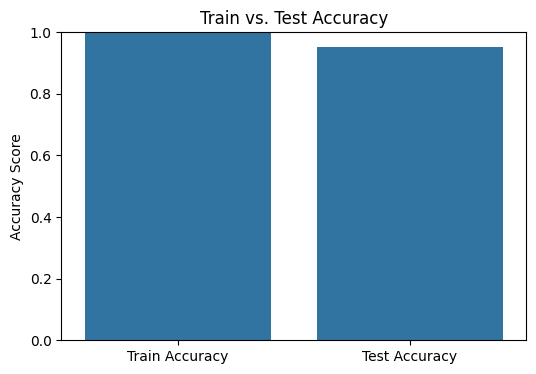

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

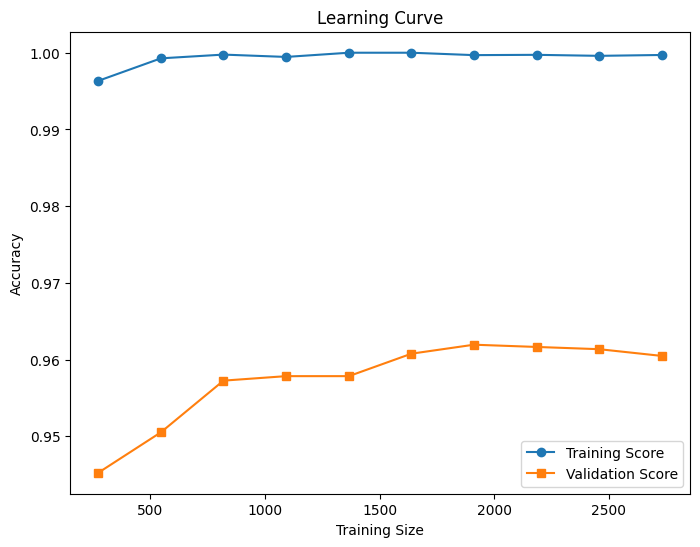

✅ Learning curve suggests good generalization.
[LightGBM] [Info] Number of positive: 1700, number of negative: 1032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 2732, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.622255 -> initscore=0.499130
[LightGBM] [Info] Start training from score 0.499130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

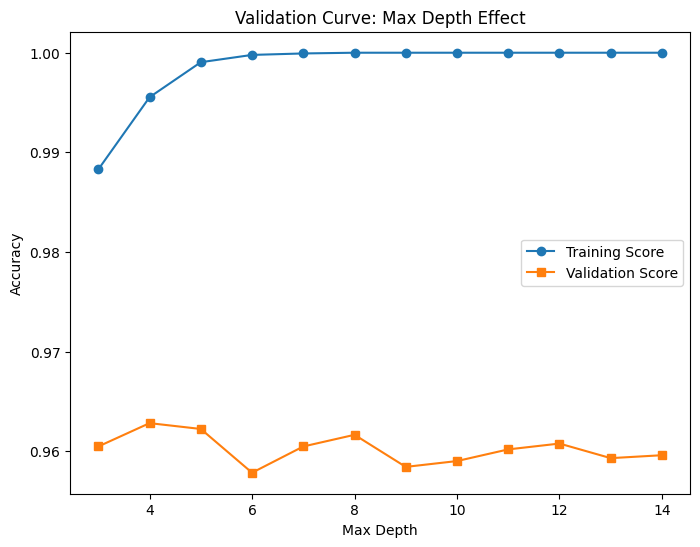

In [259]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve, validation_curve
from lightgbm import LGBMClassifier

# Function to plot Train vs Test Accuracy (Overfitting Analysis)
def plot_train_vs_test_accuracy(model, X_train_scaled, y_train, X_test_scaled, y_test):
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc])
    plt.title('Train vs. Test Accuracy')
    plt.ylim(0, 1)
    plt.ylabel('Accuracy Score')
    plt.show()

    if train_acc > test_acc + 0.1:
        print("Overfitting detected: The model performs well on training data but poorly on test data.")
    elif train_acc < 0.7 and test_acc < 0.7:
        print("Underfitting detected: The model is not learning well from the data.")
    else:
        print("The model is generalizing well.")

# Function to plot Learning Curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
    plt.plot(train_sizes, test_mean, label="Validation Score", marker='s')
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()
    plt.show()

    if train_mean[-1] > test_mean[-1] + 0.1:
        print("⚠️ Learning curve suggests overfitting.")
    elif train_mean[-1] < 0.7 and test_mean[-1] < 0.7:
        print("⚠️ Learning curve suggests underfitting.")
    else:
        print("✅ Learning curve suggests good generalization.")

# Function to plot Validation Curve (Effect of max_depth)
def plot_validation_curve(X, y):
    param_range = range(3, 15)
    train_scores, test_scores = validation_curve(
        LGBMClassifier(),
        X, y,
        param_name="max_depth",
        param_range=param_range,
        cv=5,
        scoring="accuracy"
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_mean, label="Training Score", marker='o')
    plt.plot(param_range, test_mean, label="Validation Score", marker='s')
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.title("Validation Curve: Max Depth Effect")
    plt.legend()
    plt.show()

# Run Overfitting & Underfitting Analysis
plot_train_vs_test_accuracy(best_model, X_train_scaled, y_train, X_test_scaled, y_test)
plot_learning_curve(best_model, X_train_scaled, y_train)
plot_validation_curve(X_train_scaled, y_train)


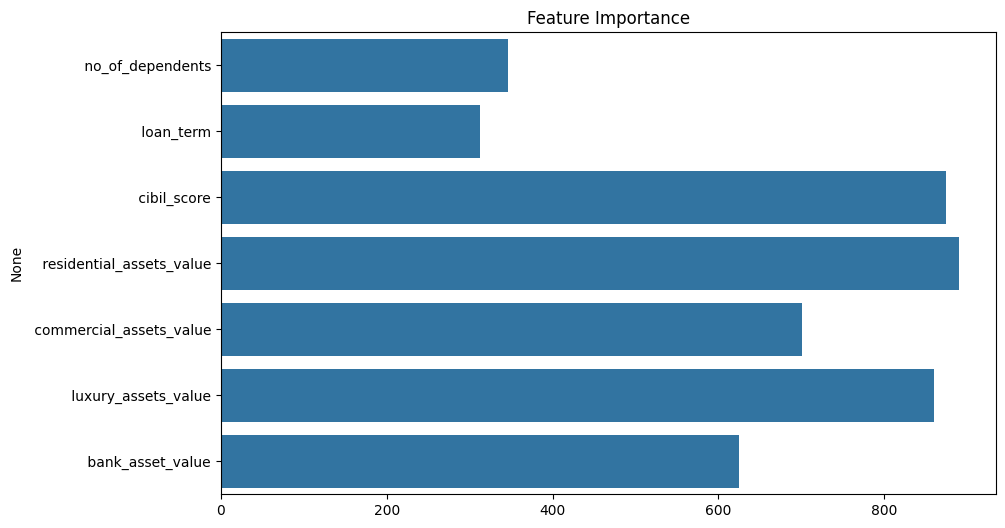

In [260]:
# Feature Importance
feature_importance = best_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.show()

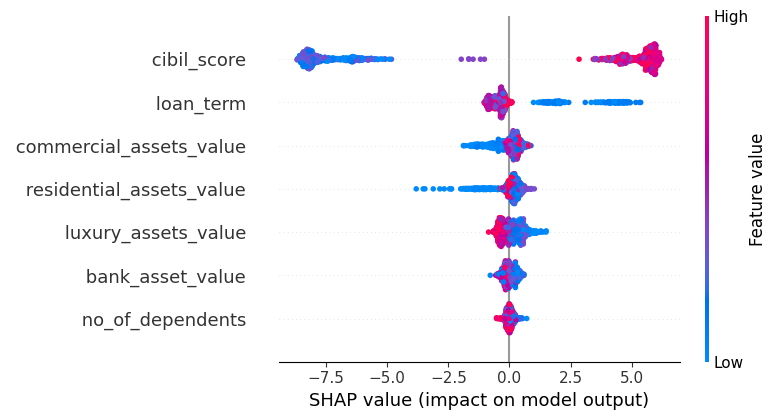

In [261]:
# SHAP Analysis
explainer = shap.Explainer(best_model, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [271]:
new_input = np.array([760,3, 10, 500000, 60000, 200000, 1000000]).reshape(1, -1)  # Example loan application data
new_input_scaled = scaler.transform(new_input)
prediction = best_model.predict(new_input_scaled)
predicted_class = 'Approved' if prediction[0] == 1 else 'Rejected'
print(f"Predicted Loan Status: {predicted_class}")

[LightGBM] [Warning] feature_fraction is set=0.6975523699145958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6975523699145958
[LightGBM] [Warning] bagging_fraction is set=0.7564530137960623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7564530137960623
Predicted Loan Status: Rejected


In [265]:
explain_instance(loan_data_scaled[0])

KeyError: 7